# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [61]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

In [153]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
breast_cancer = load_breast_cancer()
#print(breast_cancer.feature_names)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=1)
RFC.fit(X_train,y_train)
#RFC.fit(X,y)
#print(X)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [154]:
prediction_0 = RFC.estimators_[0].predict(X_test)
prediction_1 = RFC.estimators_[1].predict(X_test)
print(prediction_0)
print(predictions[0])

from scipy.stats.stats import pearsonr
pearsonr(prediction_0,prediction_1)[0]

[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.
  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  1.  1.  1.  1.]
[ 0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  1.  1.  1.]


0.69926336854543703

In [155]:
predictions = []
for i in range(0,10):
    predictions.append(RFC.estimators_[i].predict(X_test))

#print(prediction_0==predictions[0])
Sum = 0
N = 0
for i in range(0,10):
    for j in range(i+1,10):
        Sum += pearsonr(predictions[i],predictions[j])[0]
        N += 1

Sum = Sum/N
print("mean correlation between trees is %f"%Sum)

mean correlation between trees is 0.760710


In [132]:
RFC_noBootstrap = RandomForestClassifier(bootstrap=False,random_state=1)
RFC_noBootstrap.fit(X_train,y_train)
predictions = []
for i in range(0,10):
    predictions.append(RFC_noBootstrap.estimators_[i].predict(X_test))

#print(prediction_0==predictions[0])
Sum = 0
N = 0
for i in range(0,10):
    for j in range(i+1,10):
        Sum += pearsonr(predictions[i],predictions[j])[0]
        N += 1

Sum = Sum/N
print("mean correlation between trees is %f"%Sum)

mean correlation between trees is 0.781798


Mean correlation of RandomForestClassifier is 78% without bootstrap and is reduced to 76%. It's not a very big decrease

# correlation vs n of max features

In [144]:
len(breast_cancer.feature_names)

30

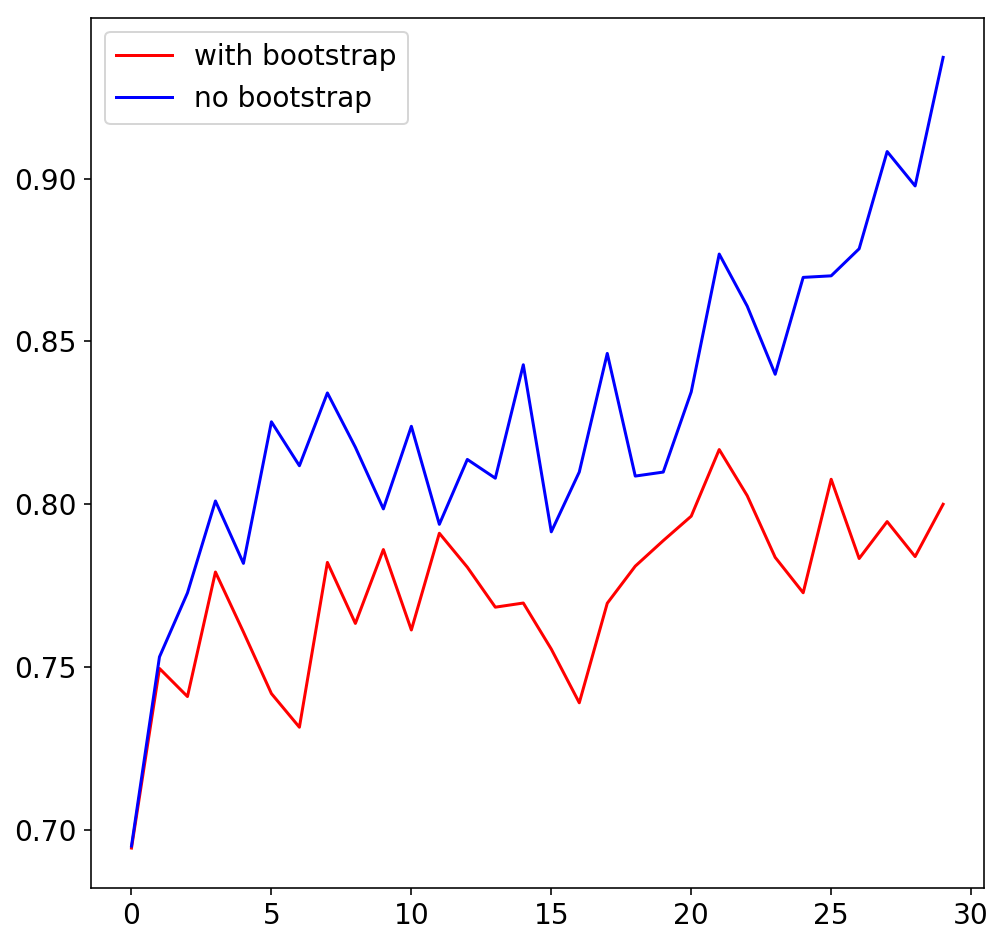

In [169]:
mean_corr_withbootstrap = []
mean_corr_nobootstrap = []

for k in range(1,31):
    RFC_testMaxF = RandomForestClassifier(max_features=k,random_state=1,bootstrap=True)
    RFC_testMaxF.fit(X_train,y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(RFC_testMaxF.estimators_[i].predict(X_test))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_withbootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)

for k in range(1,31):
    RFC_testMaxF = RandomForestClassifier(max_features=k,random_state=1,bootstrap=False)
    RFC_testMaxF.fit(X_train,y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(RFC_testMaxF.estimators_[i].predict(X_test))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_nobootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)
    
plt.plot(mean_corr_withbootstrap,c='r',label="with bootstrap")
plt.plot(mean_corr_nobootstrap,c='b',label="no bootstrap")
plt.legend(loc='best')

In [182]:
X_train.shape

(455, 30)

In [183]:
X_test.shape

(114, 30)

In [194]:
0.5 * X_train.shape[1]

15.0

In [174]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [206]:
BC = BaggingClassifier(max_features=1,random_state=1,bootstrap=True)
BC.fit(X_train,y_train) #[:,:1]
predictions = []
for i in range(0,10):
    predictions.append(BC.estimators_[i].predict(X_test)) #[:,:1]

#print(prediction_0==predictions[0])
Sum = 0
N = 0
for i in range(0,10):
    for j in range(i+1,10):
        Sum += pearsonr(predictions[i],predictions[j])[0]
        N += 1

Sum = Sum/N
mean_corr_withbootstrap.append(Sum)
print("mean correlation between trees is %f"%Sum)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 30 

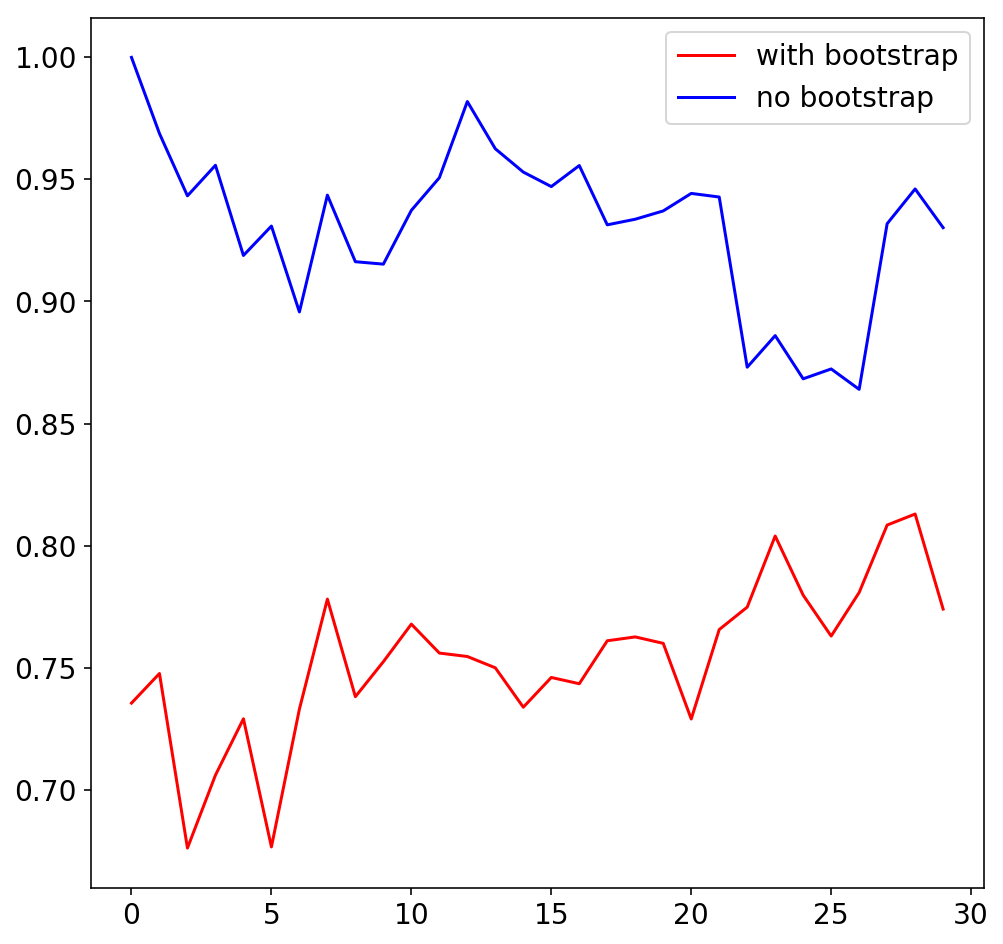

In [200]:
mean_corr_withbootstrap = []
mean_corr_nobootstrap = []

for k in range(1,31):
    BC = BaggingClassifier(max_features=k,random_state=1,bootstrap=True)
    BC.fit(X_train[:,:k],y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(BC.estimators_[i].predict(X_test[:,:k]))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_withbootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)

for k in range(1,31):
    BC = BaggingClassifier(max_features=k,random_state=1,bootstrap=False)
    BC.fit(X_train[:,:k],y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(BC.estimators_[i].predict(X_test[:,:k]))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_nobootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)
    
plt.plot(mean_corr_withbootstrap,c='r',label="with bootstrap")
plt.plot(mean_corr_nobootstrap,c='b',label="no bootstrap")
plt.legend(loc='best')

In [202]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier()

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

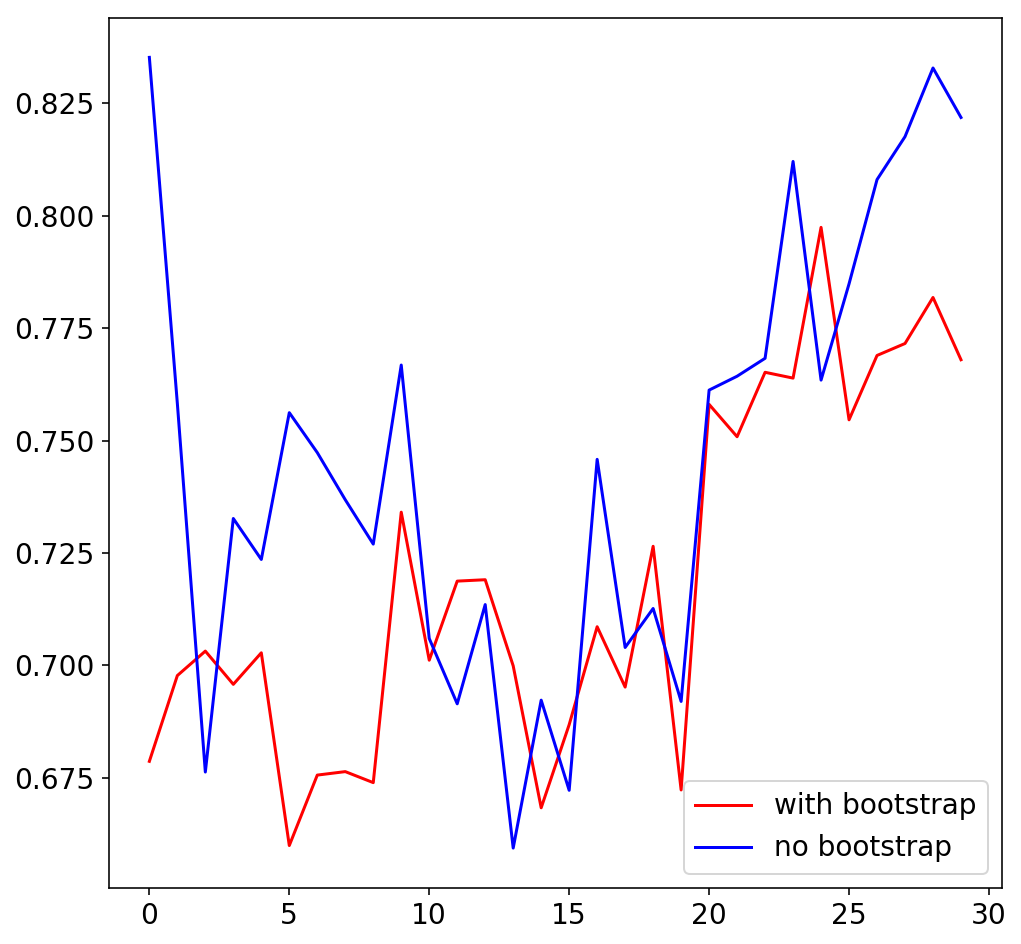

In [208]:
mean_corr_withbootstrap = []
mean_corr_nobootstrap = []

for k in range(1,31):
    ETC = ExtraTreesClassifier(max_features=k,random_state=1,bootstrap=True)
    ETC.fit(X_train[:,:k],y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(ETC.estimators_[i].predict(X_test[:,:k]))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_withbootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)

for k in range(1,31):
    ETC = ExtraTreesClassifier(max_features=k,random_state=1,bootstrap=False)
    ETC.fit(X_train[:,:k],y_train)
    predictions = []
    for i in range(0,10):
        predictions.append(ETC.estimators_[i].predict(X_test[:,:k]))

    #print(prediction_0==predictions[0])
    Sum = 0
    N = 0
    for i in range(0,10):
        for j in range(i+1,10):
            Sum += pearsonr(predictions[i],predictions[j])[0]
            N += 1

    Sum = Sum/N
    mean_corr_nobootstrap.append(Sum)
    #print("mean correlation between trees is %f"%Sum)
    
plt.plot(mean_corr_withbootstrap,c='r',label="with bootstrap")
plt.plot(mean_corr_nobootstrap,c='b',label="no bootstrap")
plt.legend(loc='best')

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [219]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
digits.DESCR
X.shape
digits.images[0].shape
digits.images.shape
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

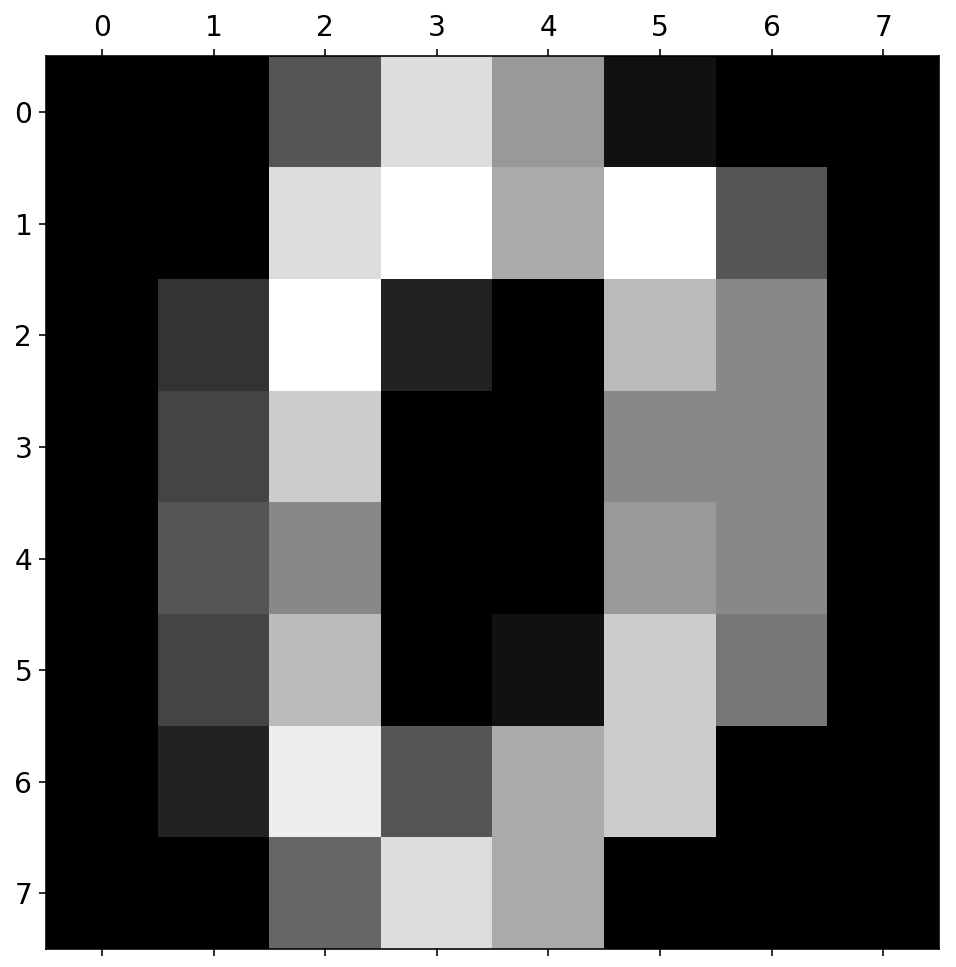

In [233]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

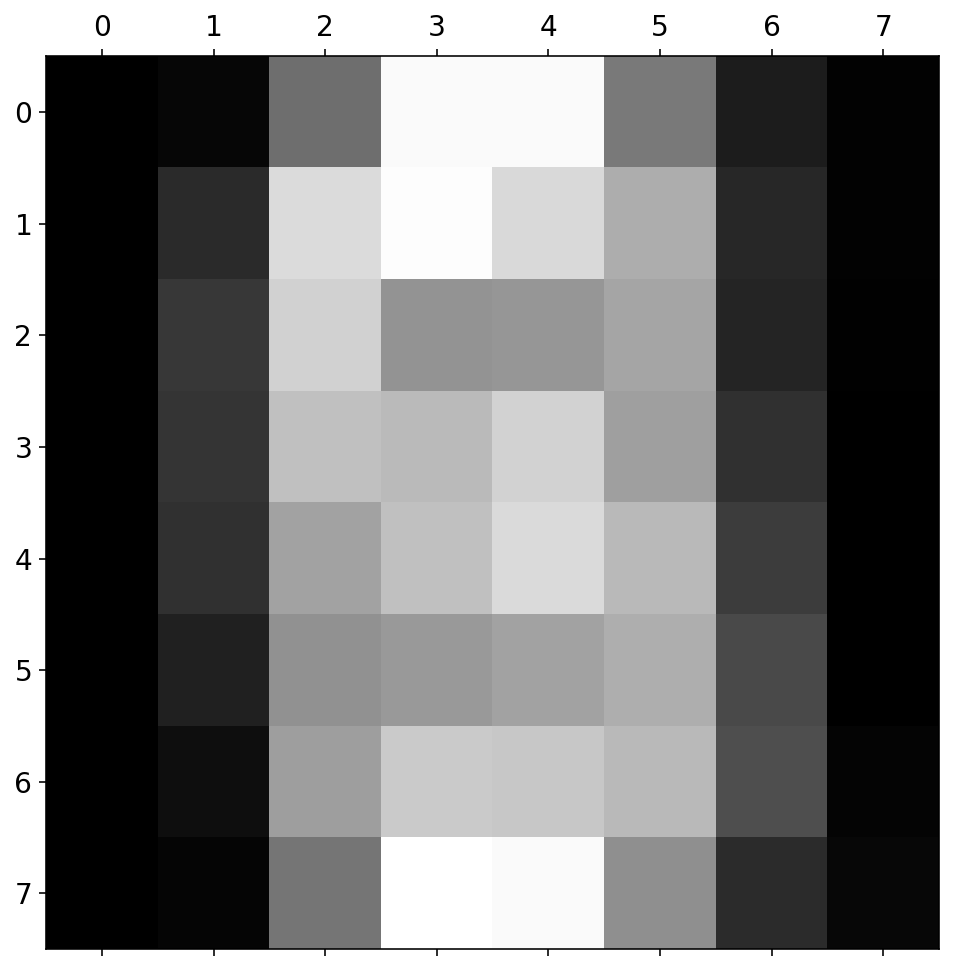

In [218]:
Sum = 0
for i in range(0,digits.images.shape[0]):
    Sum += digits.images[i]
Sum = Sum/digits.images.shape[0]
plt.gray() 
plt.matshow(Sum) 
plt.show() 

RandomForestClassifier

ExtraTreesClassifier

GradientBoostedTreesClassifier

In [225]:
index = np.arange(0,64)
bar_width = 0.25
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=1000, max_depth=2,
                                 learning_rate=0.1, subsample=0.5)
GBC.fit(X_train, y_train)

RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)

ETC = ExtraTreesClassifier(n_estimators=200)
ETC.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

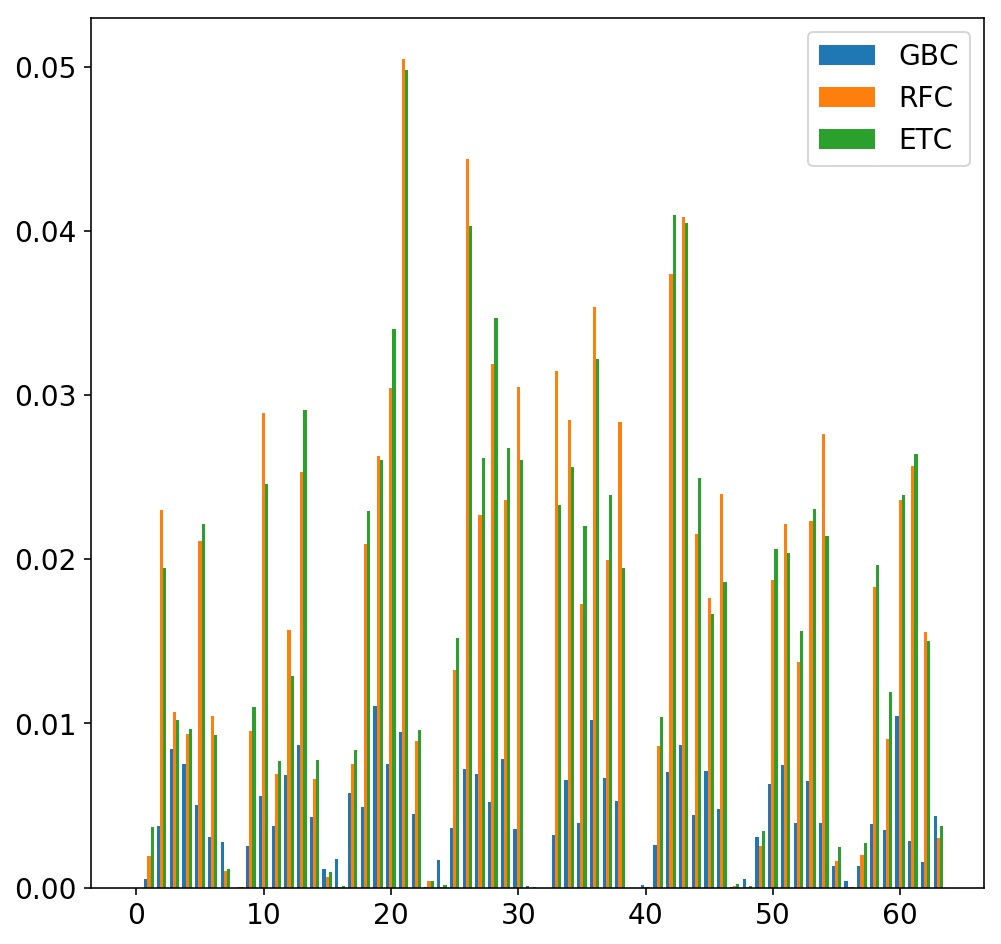

In [231]:
plt.bar(index - bar_width, GBC.feature_importances_, bar_width, label='GBC')
plt.bar(index, RFC.feature_importances_, bar_width, label='RFC')
plt.bar(index + bar_width, ETC.feature_importances_, bar_width, label='ETC')

plt.legend(loc='best')
#plt.xticks(index);

In [260]:
X_test[0].reshape(8,8).shape

(8, 8)

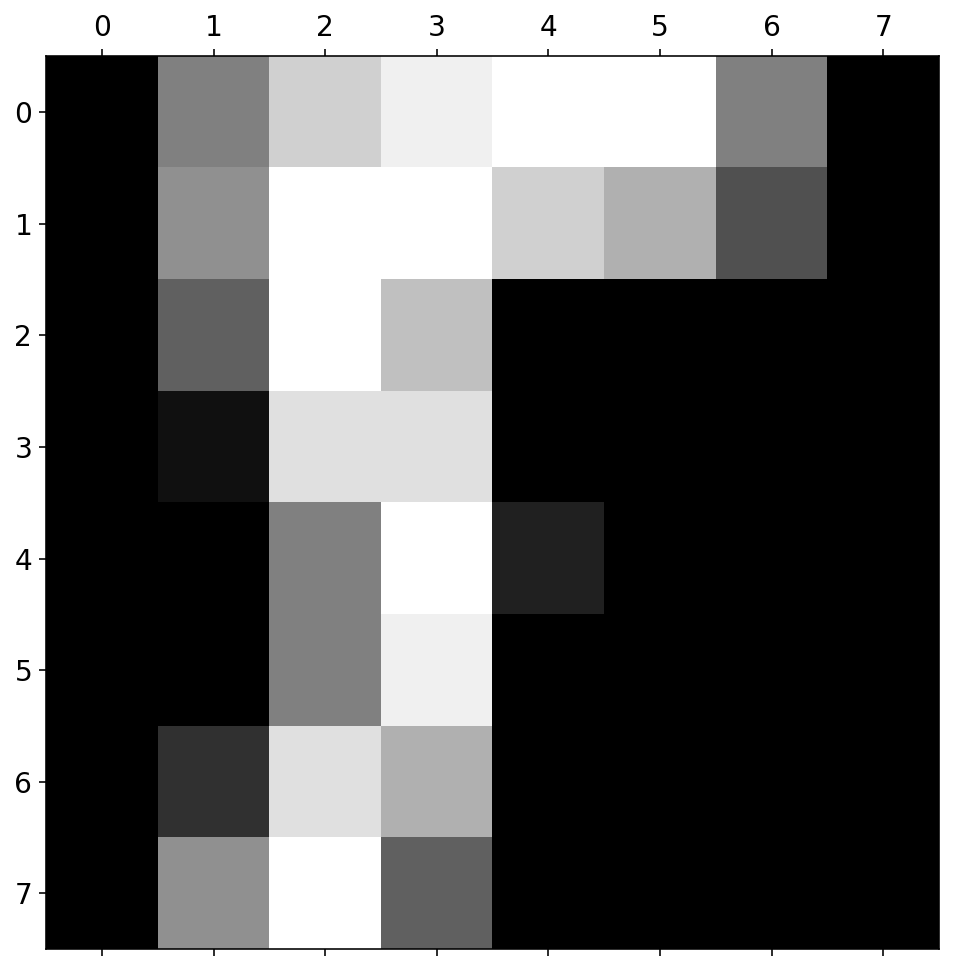

array([5])

In [259]:
plt.gray() 
plt.matshow(X_test[1].reshape(8,8)) 
plt.show() 
RFC.predict(X_test[1].reshape(1, -1))

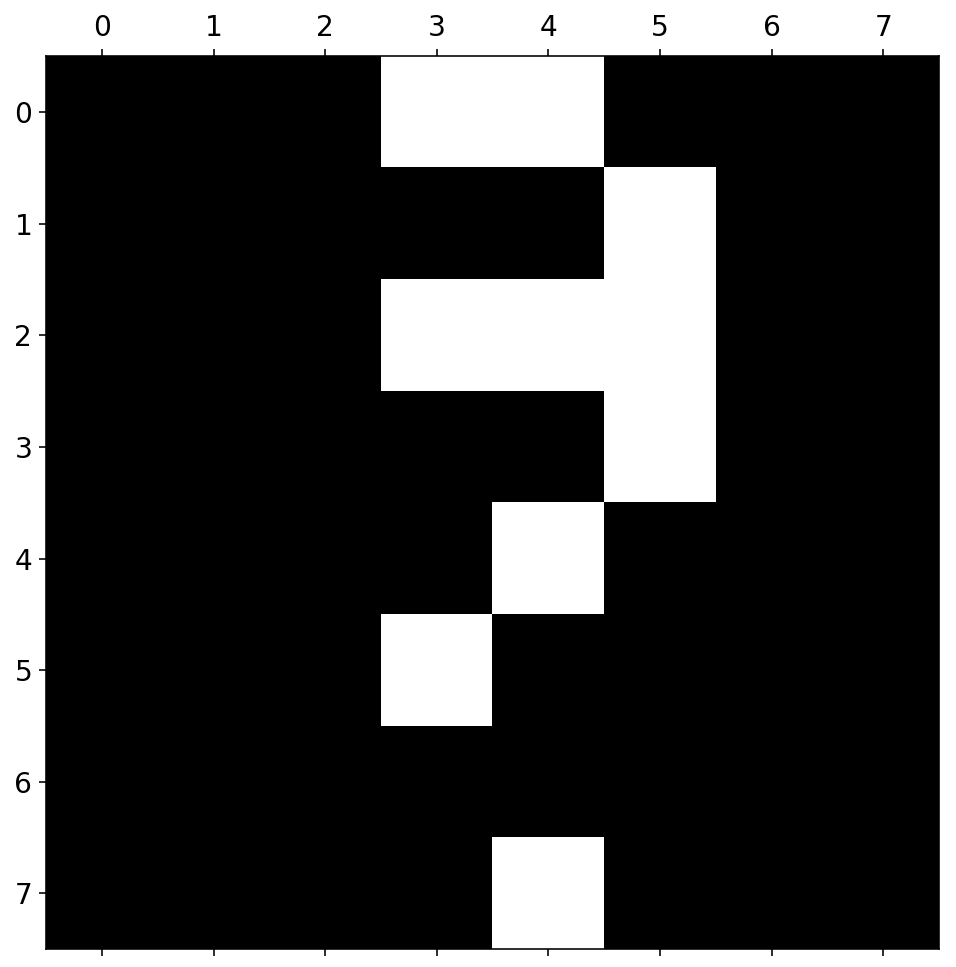

In [277]:
#print(RFC.feature_importances_)
#index[np.argmax(RFC.feature_importances_)]
ind = np.argpartition(GBC.feature_importances_, -10)[-10:]
test = np.zeros(64)
test[ind] = 16
plt.gray() 
plt.matshow(test.reshape(8,8)) 
plt.show() 

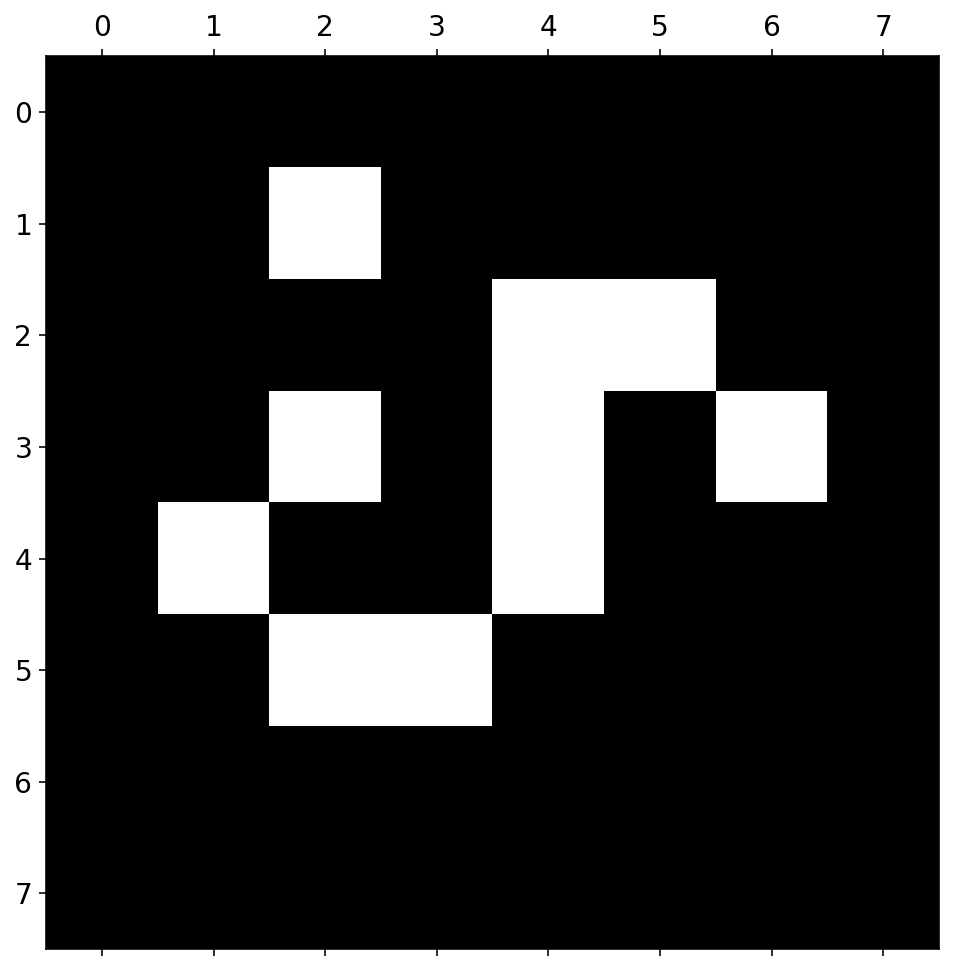

In [279]:
ind = np.argpartition(RFC.feature_importances_, -10)[-10:]
test = np.zeros(64)
test[ind] = 16
plt.gray() 
plt.matshow(test.reshape(8,8)) 
plt.show() 

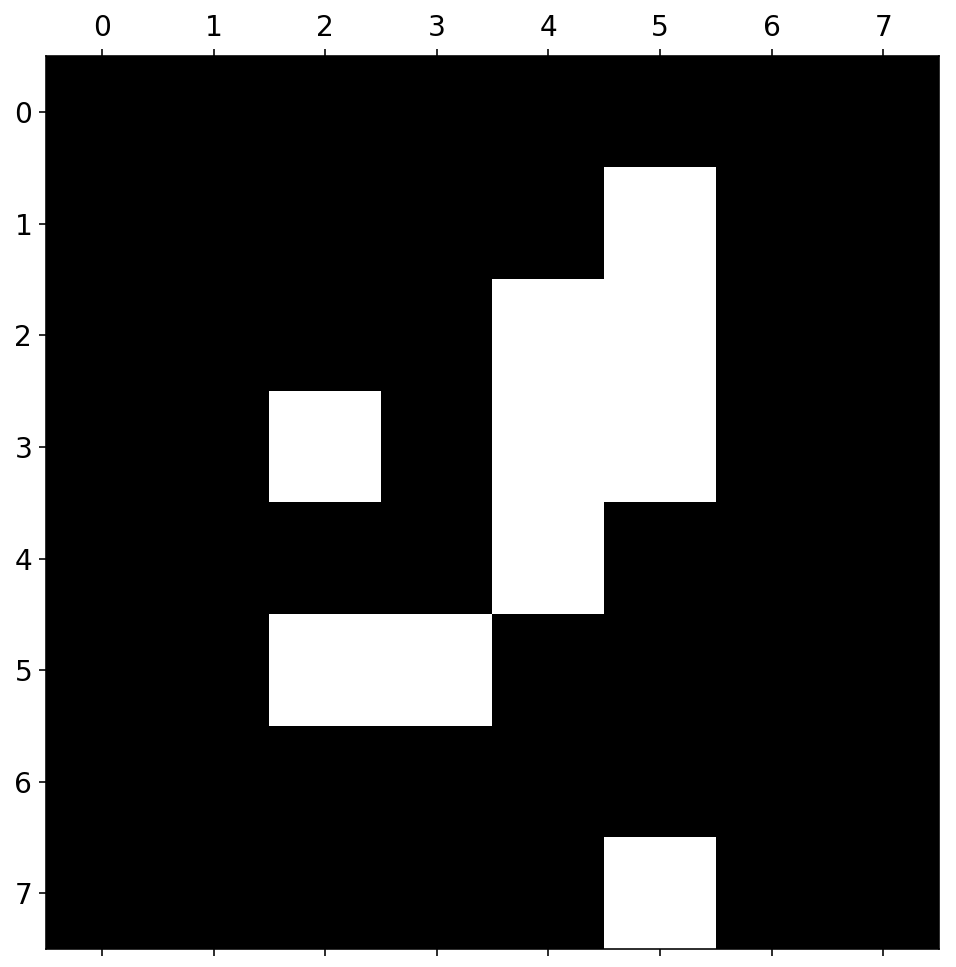

In [280]:
ind = np.argpartition(ETC.feature_importances_, -10)[-10:]
test = np.zeros(64)
test[ind] = 16
plt.gray() 
plt.matshow(test.reshape(8,8)) 
plt.show() 

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [281]:
from sklearn.ensemble import GradientBoostingRegressor


def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

In [284]:
rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
rgr.fit(X,y)
rgr.feature_importances_

array([ 0.17387235,  0.13611995,  0.24843429,  0.20194025,  0.21372835,
        0.00538069,  0.01456878,  0.00595534])

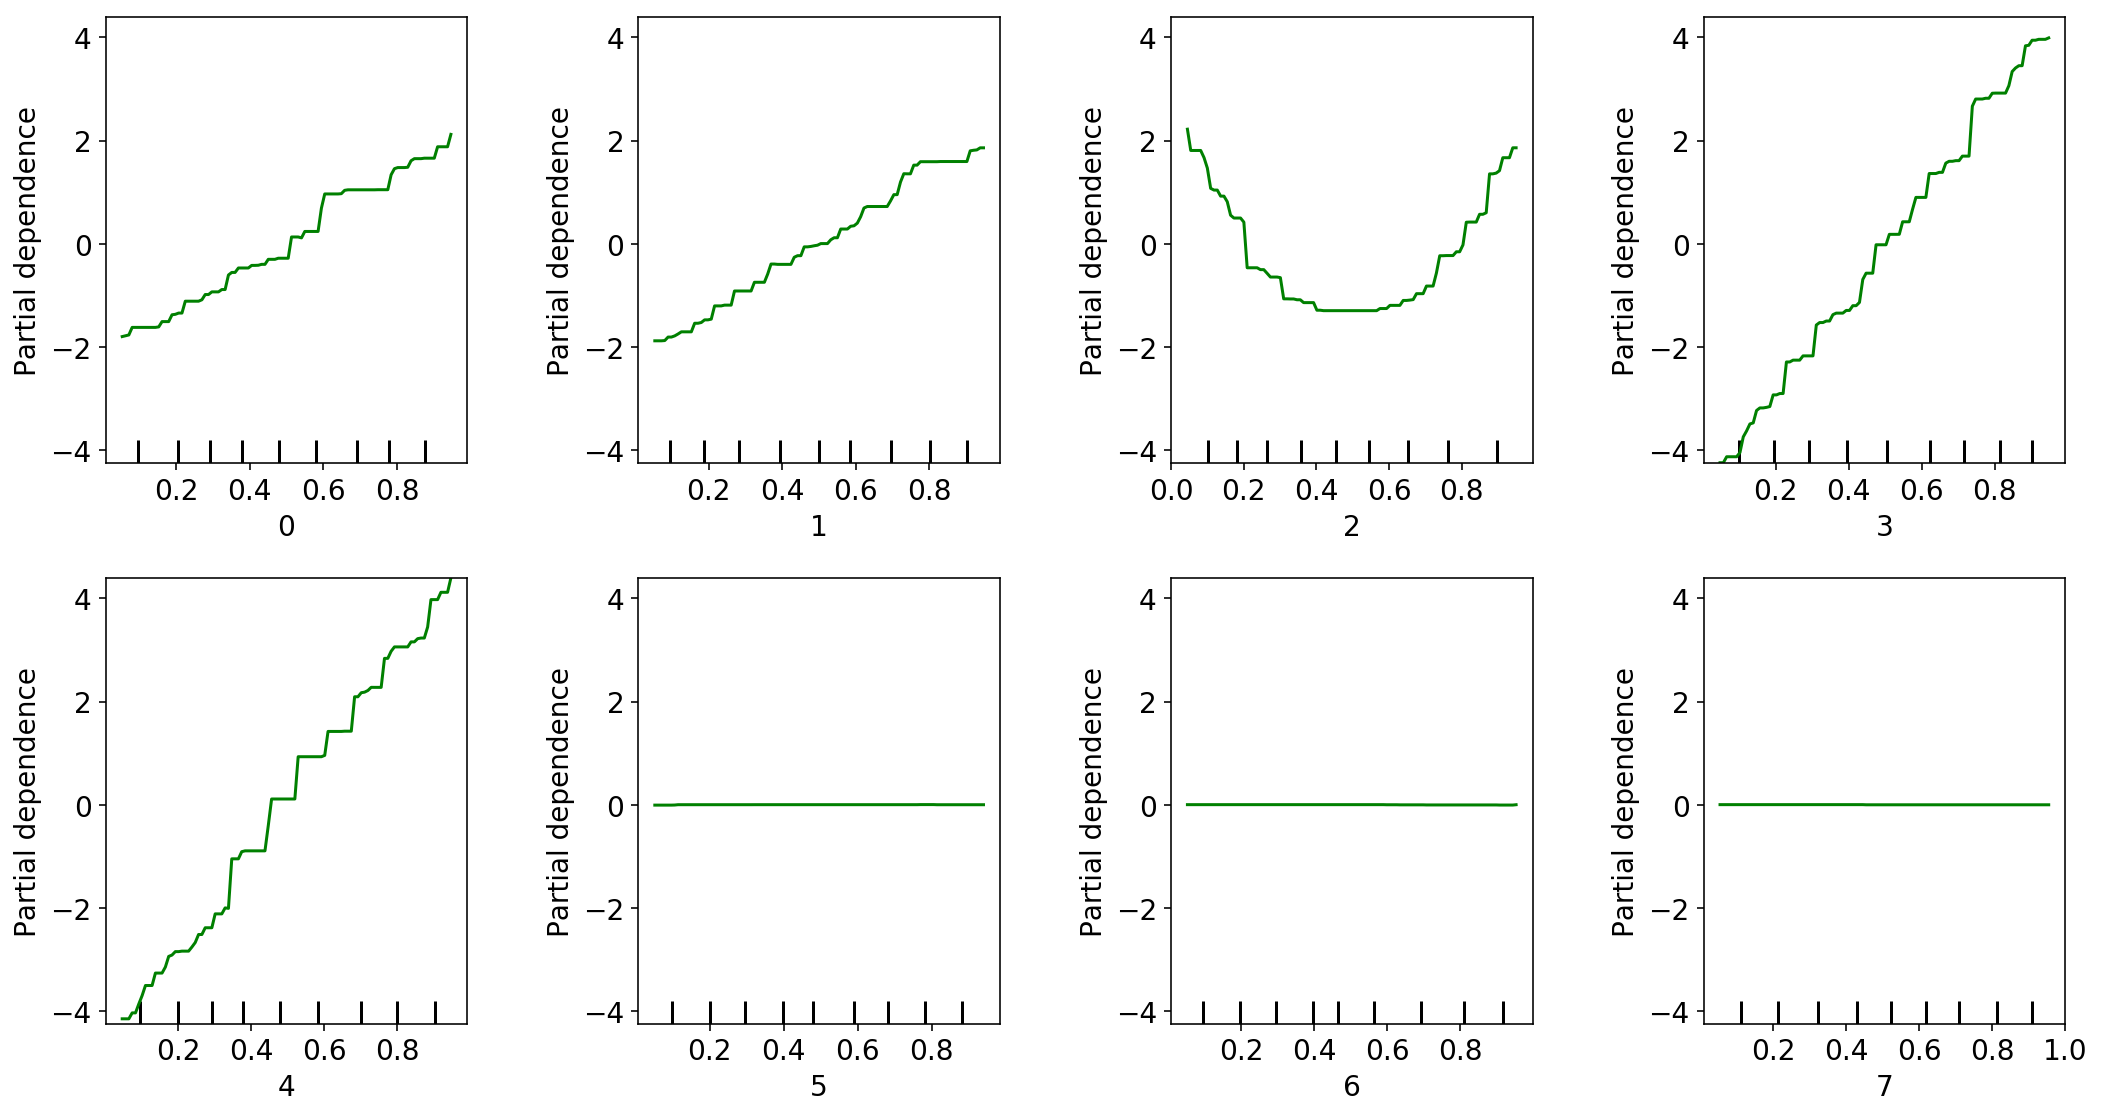

In [290]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(rgr, X, features=[0, 1, 2, 3, 4, 5, 6, 7], n_cols=4, figsize=(15,8)); #, features=[1, 7, 10], feature_names=feature_names, figsize=(15,16),
plt.tight_layout();

From the importance of the features and the plots, we see that features 5,6 and 7 are completely uninformative

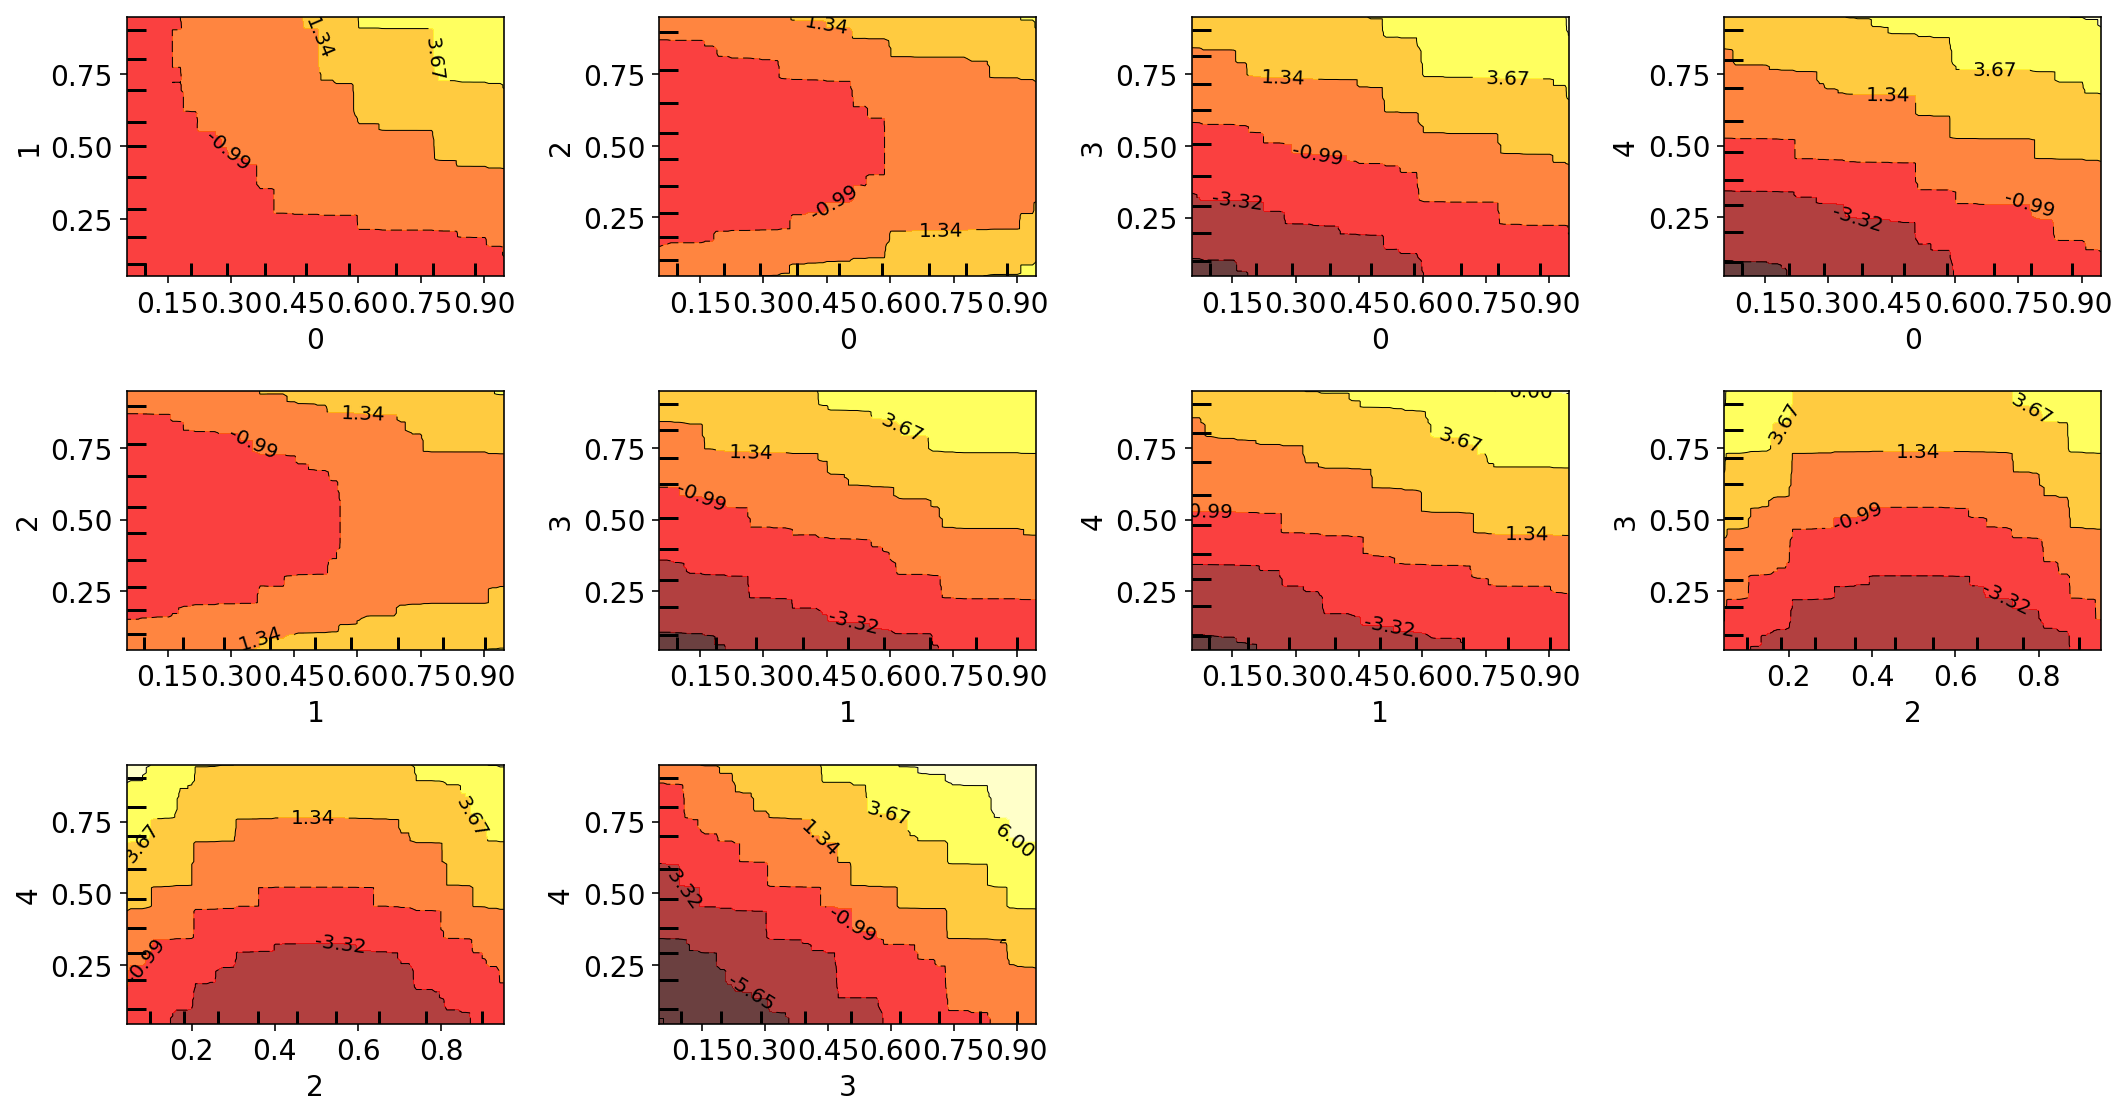

In [300]:
plt.hot()
plot_partial_dependence(rgr, X, features=[(0, 1), (0,2), (0,3), (0,4), (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)], n_cols=4, figsize=(15,8)); #, features=[1, 7, 10], feature_names=feature_names, figsize=(15,16),
plt.tight_layout();

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [ ]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

In [ ]:
# your solution